In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
import time

In [34]:
pd.set_option('display.max_columns', 200)
df = pd.read_csv('preprocessed.csv')
df.head()

,Unnamed: 0,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_1,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_UNK,payer_code_WC,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Others,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_UNK,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_486,diag_1_491,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_Others,diag_2_250,diag_2_276,diag_2_401,diag_2_403,diag_2_411,diag_2_414,diag_2_427,diag_2_428,diag_2_496,diag_2_599,diag_2_Others,diag_3_250,diag_3_272,diag_3_276,diag_3_401,diag_3_403,diag_3_414,diag_3_427,diag_3_428,diag_3_496,diag_3_585,diag_3_Others,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0,5,1,1,41,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,1,15,3,9,59,0,18,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

Since preprocessed file included all original columns plus the one-hot features, we can only select the columns that we need for training our model:

In [35]:
df = df.drop(df.columns[0],axis=1)
print(df.shape)
df.head()

(99340, 194)


,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_1,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_UNK,payer_code_WC,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Others,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_UNK,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_486,diag_1_491,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_Others,diag_2_250,diag_2_276,diag_2_401,diag_2_403,diag_2_411,diag_2_414,diag_2_427,diag_2_428,diag_2_496,diag_2_599,diag_2_Others,diag_3_250,diag_3_272,diag_3_276,diag_3_401,diag_3_403,diag_3_414,diag_3_427,diag_3_428,diag_3_496,diag_3_585,diag_3_Others,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,5,1,1,41,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,15,3,9,59,0,18,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [36]:
# input features
# X = df.iloc[:,:-3]
# # labels
# y = df.iloc[:,-3:]

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(df_train.shape,df_test.shape)
print(df_train.shape,df_test.shape)

(79472, 194) (19868, 194)
(79472, 194) (19868, 194)


In [37]:
def calculate_prevalence(y):
    print(sum(y)/len(y))

calculate_prevalence(df.iloc[:,-3])
calculate_prevalence(df_train.iloc[:,-3])
calculate_prevalence(df_test.iloc[:,-3])

0.1138916851218039
0.11421632776323737
0.11259311455607006


## Undersampling or Oversampling?

In [38]:
# def balance_out_trainset(X_train, y_train, method):
    
    

#     df_train = pd.concat([X_train, y_train],axis=1)
#     newdf = df
    
#     if method == 'undersample':
#         class_lt30 = df_train[df_train['readmitted_<30'] == 1]
#         class_notlt30 = df_train[df_train['readmitted_<30'] == 0]
#         class_gt30 = df_train[df_train['readmitted_>30'] == 1]
#         class_no = df_train[df_train['readmitted_NO'] == 1]
#         new_df = pd.concat([class_lt30, class_notlt30.sample(n=len(class_lt30),random_state=42)],axis=0)
#         new_df = new_df.sample(frac=1,random_state=42).reset_index(drop=True)
#         X = df_train.iloc[:,:-3]
 
#     elif method == 'oversample':
#         oversample = SMOTE()
#         X, y = oversample.fit_resample(X_train, y_train)


In [39]:
df_train.head()

,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_1,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_UNK,payer_code_WC,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Others,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_UNK,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_486,diag_1_491,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_Others,diag_2_250,diag_2_276,diag_2_401,diag_2_403,diag_2_411,diag_2_414,diag_2_427,diag_2_428,diag_2_496,diag_2_599,diag_2_Others,diag_3_250,diag_3_272,diag_3_276,diag_3_401,diag_3_403,diag_3_414,diag_3_427,diag_3_428,diag_3_496,diag_3_585,diag_3_Others,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
17017,65,6,4,52,6,33,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
13879,65,7,9,38,3,25,0,0,4,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [40]:
#Undersampling
class_lt30 = df_train[df_train['readmitted_<30'] == 1]
class_notlt30 = df_train[df_train['readmitted_<30'] == 0]

# balanced_df_train = pd.concat([class_lt30, class_notlt30.sample(n=len(class_lt30),random_state=42)],axis=0)
balanced_df_train = df_train.copy()
balanced_df_train = balanced_df_train.sample(frac=1,random_state=42).reset_index(drop=True)
balanced_df_train.head()

,age,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_1,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_UNK,payer_code_WC,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Others,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_UNK,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_486,diag_1_491,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_Others,diag_2_250,diag_2_276,diag_2_401,diag_2_403,diag_2_411,diag_2_414,diag_2_427,diag_2_428,diag_2_496,diag_2_599,diag_2_Others,diag_3_250,diag_3_272,diag_3_276,diag_3_401,diag_3_403,diag_3_414,diag_3_427,diag_3_428,diag_3_496,diag_3_585,diag_3_Others,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,85,3,5,28,2,16,3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
1,85,7,9,56,0,18,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [41]:
# calculate_prevalence(balanced_df_train.iloc[:,-3:-2],'trainig set')

Let's seperate the dataframe into labels(y) and features (X): 

In [42]:
all_X_train = df_train.iloc[:,:-3]
X_train = balanced_df_train.iloc[:,:-3].values
X_test = df_test.iloc[:,:-3].values

y_train = balanced_df_train.iloc[:,-3].values
y_test = df_test.iloc[:,-3].values

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
calculate_prevalence(y_train)

(79472, 191) (79472,) (19868, 191) (19868,)
0.11421632776323737


In [43]:
# # !pip install imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE, KMeansSMOTE, ADASYN,RandomOverSampler, SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour, RandomUnderSampler
# oversample = SMOTE()
# oversample = SVMSMOTE(random_state=42)
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [44]:
# counter = Counter(y_train)
# print(X_train.shape)
# print(counter)
# calculate_prevalence(y_train)

To make sure that different size in the variables is not going to make a problem in any of the models, we should normalize them. One way to do that is to use the standard scaler which removes the mean and scales down to unit variance.

In [45]:
scaler  = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [ ]:
# !pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42),
    XGBClassifier(random_state=42,learning_rate=0.01)
    
]
kf = 5
cv_df = pd.DataFrame(index=range(kf * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    imba_pipeline = make_pipeline(SMOTE(random_state=42),shuffle(random_state=42), model)
    accuracies = cross_val_score(imba_pipeline, X_train_tf, y_train, scoring='accuracy', cv=kf)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

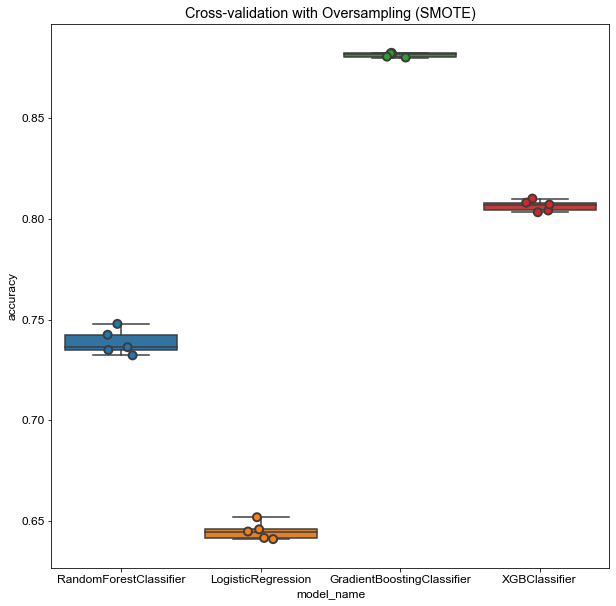

In [67]:
import seaborn as sns

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='model_name', y='accuracy', data=cv_df,ax=ax)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,ax=ax, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_title('Cross-validation with Oversampling (SMOTE)')
plt.show()

In [73]:
mean_accs = cv_df.groupby('model_name',as_index=False).accuracy.mean()
mean_accs

,model_name,accuracy
0,GradientBoostingClassifier,0.881606
1,LogisticRegression,0.644831
2,RandomForestClassifier,0.738701
3,XGBClassifier,0.806586


In [84]:
# !pip install plotly
import plotly.graph_objects as go
mean_accs['accuracy'] = mean_accs['accuracy'].round(decimals = 2)
fig = go.Figure(data=[go.Table(header=dict(values=['Model Name', 'Mean Accuracy']),
                               cells=dict(values=[mean_accs.model_name.values, mean_accs.accuracy.values],
    align=['left', 'center']))
                     ])
fig.update_layout(title={
        'text': "Oversampling (SMOTE)" ,
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=550, height=300)

fig.show()

In [16]:
def print_results(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    labels = ['Not readmiited <30 days', 'readmiited <30 days']
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print(metrics.classification_report(y_test, y_pred))

In [17]:
def plot_important_features(model, column_names, num_features, plot_title, first_or_last = 'first'):
    
    if model.__class__.__name__ == 'LogisticRegression':
        feature_importances = model.coef_[0]
    else:
        feature_importances = model.feature_importances_

    feature_importances = pd.DataFrame(feature_importances,
                                       index = column_names,
                                        columns=['importance']).sort_values('importance',
                                                                            ascending=False)
    ylocs = np.arange(num_features)
    if first_or_last == 'last':
        values_to_plot = feature_importances.iloc[-num_features:].values.ravel()
        feature_labels = list(feature_importances.iloc[-num_features:].index)

    else:
        # get the feature importance for top num and sort in reverse order
        values_to_plot = feature_importances.iloc[:num_features].values.ravel()[::-1]
        feature_labels = list(feature_importances.iloc[:num_features].index)[::-1] 

    plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
    plt.barh(ylocs, values_to_plot, align = 'center')
    plt.ylabel('Features')
    plt.xlabel('Importance Score')
    plt.title(plot_title)
    plt.yticks(ylocs, feature_labels)
    plt.show()

In [48]:
oversample = SMOTE(random_state=42)
X_train_os, y_train_os = oversample.fit_resample(X_train_tf, y_train)
X_train_os, y_train_os = shuffle(X_train_os, y_train_os, random_state=42)

In [ ]:
# selection_model = XGBClassifier(learning_rate=0.1, max_depth=2,n_estimators=400)
xgb_model = models[3]
xgb_model.fit(X_train_os, y_train_os)
xgb_y_pred = xgb_model.predict(X_test_tf)

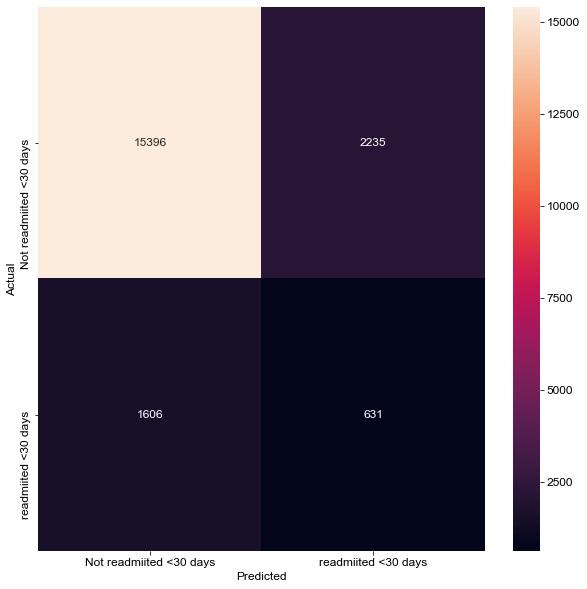

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     17631
           1       0.22      0.28      0.25      2237

    accuracy                           0.81     19868
   macro avg       0.56      0.58      0.57     19868
weighted avg       0.83      0.81      0.82     19868



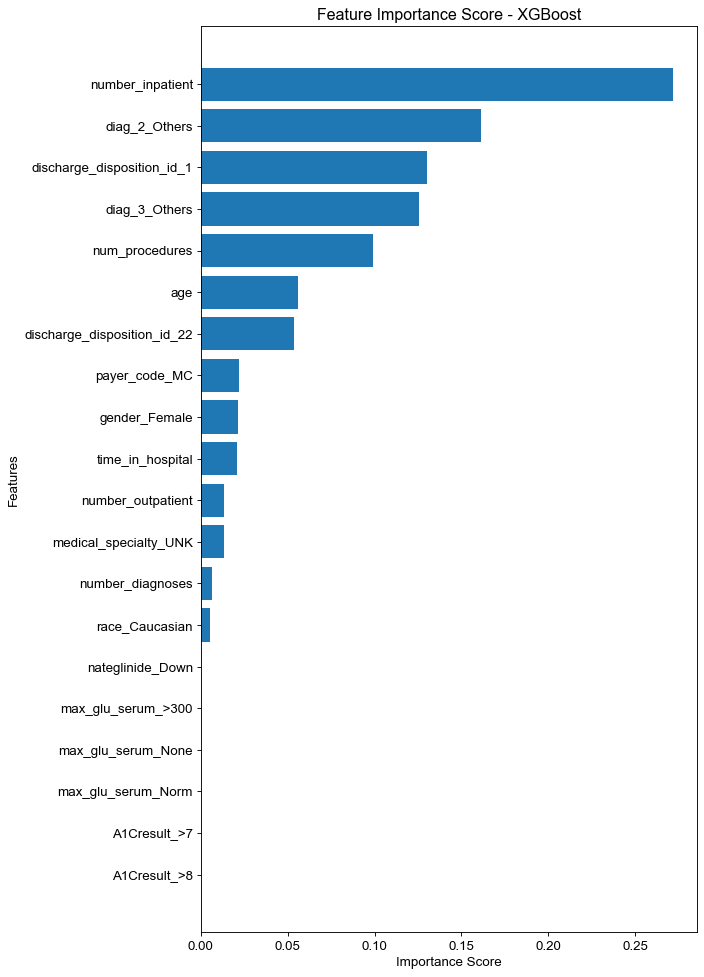

0.5776544250261033

In [85]:
print_results(y_test, xgb_y_pred)
plot_important_features(xgb_model, list(all_X_train.columns), 20, 'Feature Importance Score - XGBoost')
roc_auc_score(y_test, xgb_y_pred)

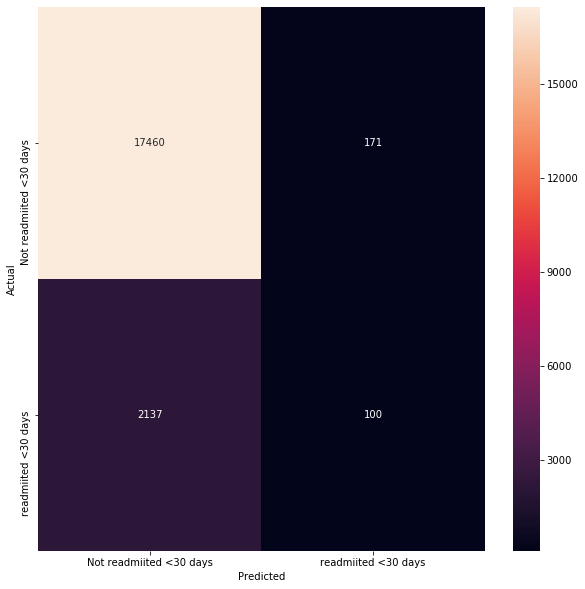

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17631
           1       0.37      0.04      0.08      2237

    accuracy                           0.88     19868
   macro avg       0.63      0.52      0.51     19868
weighted avg       0.83      0.88      0.84     19868



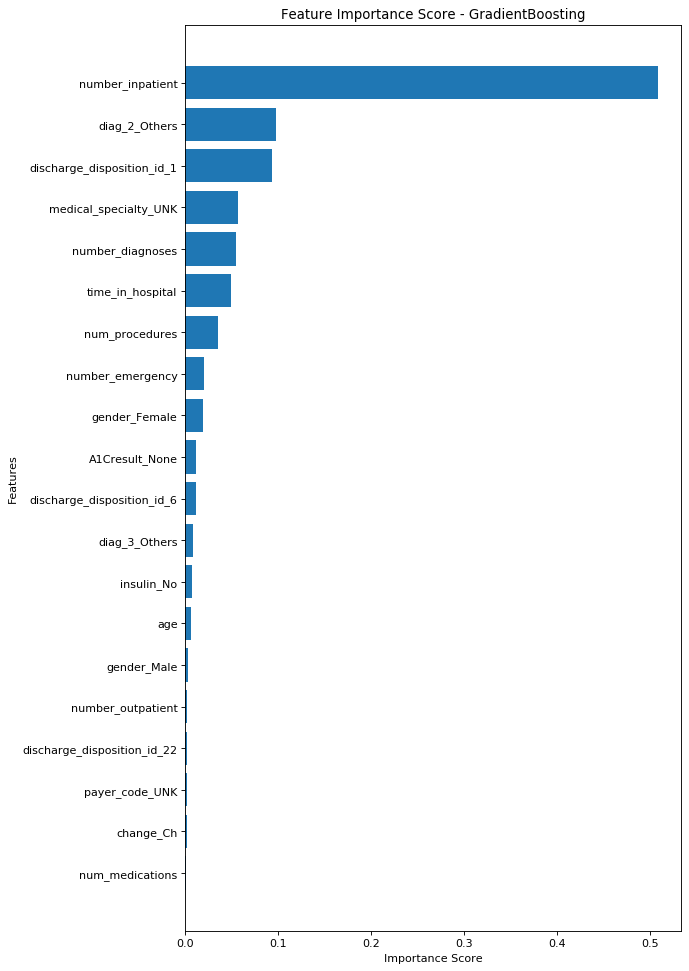

In [62]:
# selection_model = XGBClassifier(learning_rate=0.1, max_depth=2,n_estimators=400)
gb_model = models[2]
gb_model.fit(X_train_os, y_train_os)  

gb_y_pred = gb_model.predict(X_test_tf)
print_results(y_test, gb_y_pred)
plot_important_features(gb_model, list(all_X_train.columns), 20, 'Feature Importance Score - GradientBoosting')

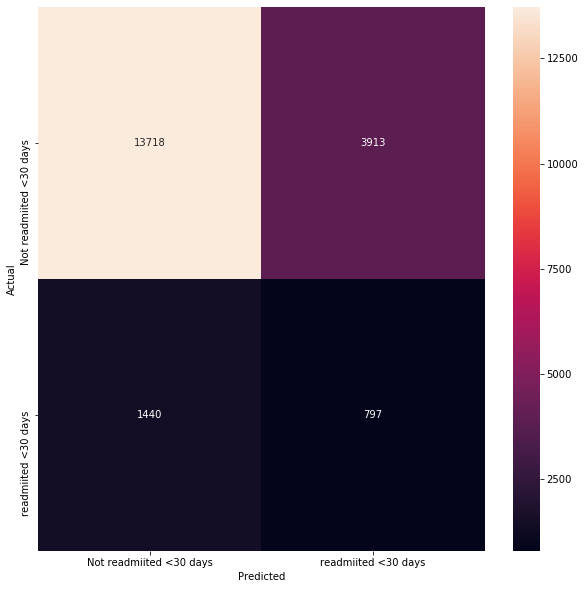

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     17631
           1       0.17      0.36      0.23      2237

    accuracy                           0.73     19868
   macro avg       0.54      0.57      0.53     19868
weighted avg       0.82      0.73      0.77     19868



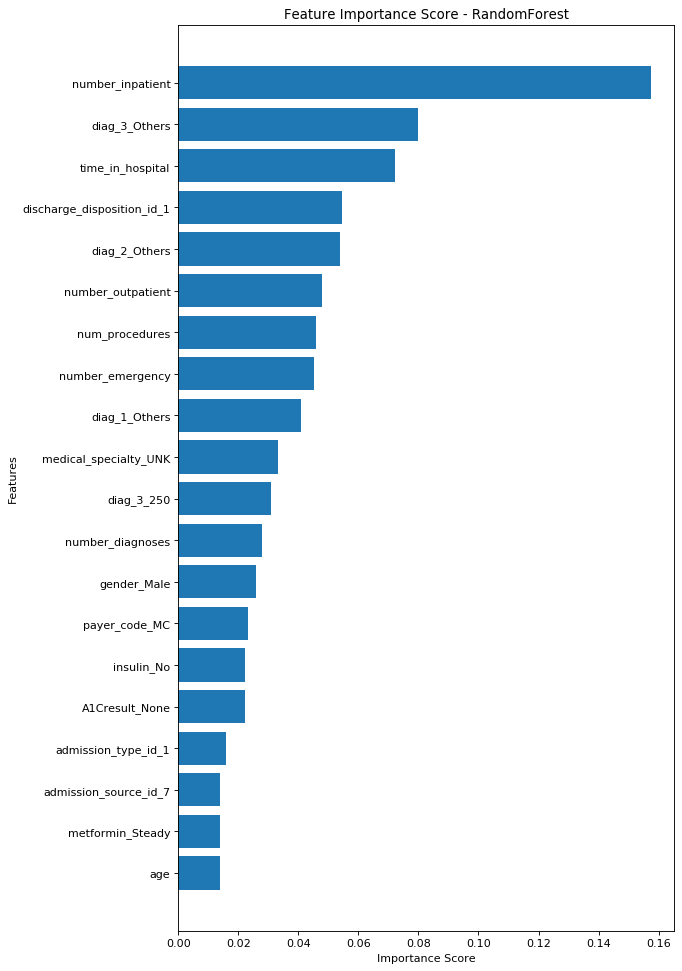

In [63]:
# selection_model = XGBClassifier(learning_rate=0.1, max_depth=2,n_estimators=400)
rf_model = models[0]
rf_model.fit(X_train_os, y_train_os)  

rf_y_pred = rf_model.predict(X_test_tf)
print_results(y_test, rf_y_pred)
plot_important_features(rf_model, list(all_X_train.columns), 20, 'Feature Importance Score - RandomForest')

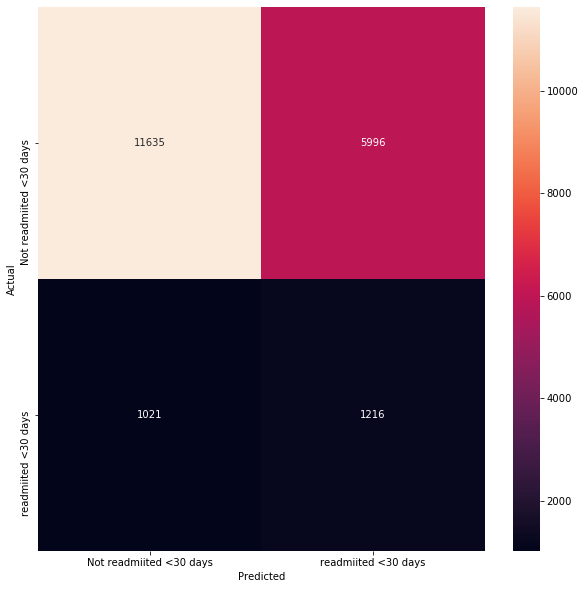

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     17631
           1       0.17      0.54      0.26      2237

    accuracy                           0.65     19868
   macro avg       0.54      0.60      0.51     19868
weighted avg       0.83      0.65      0.71     19868



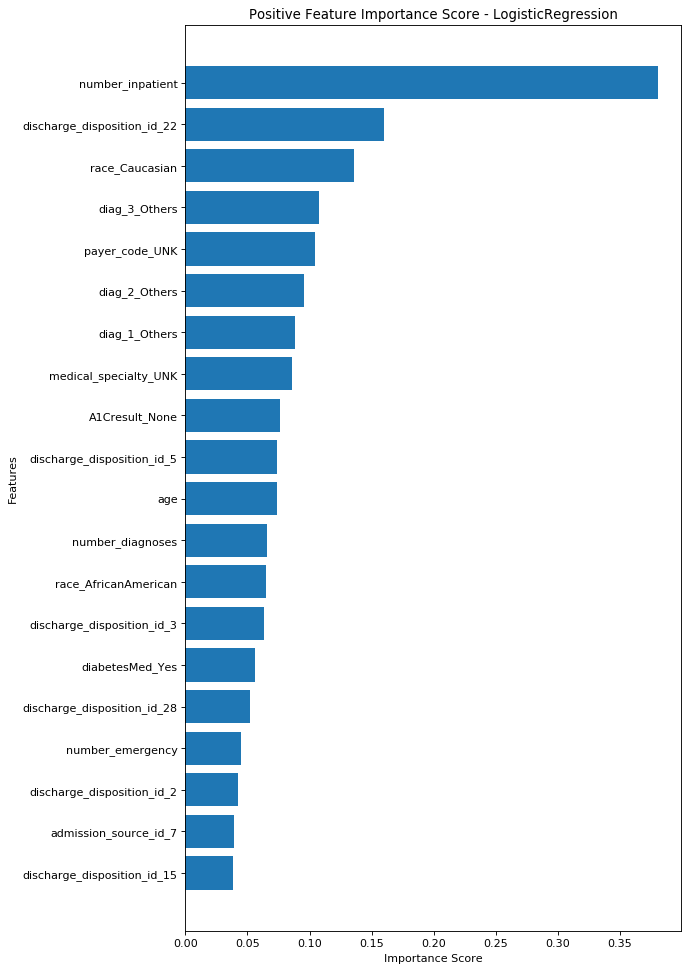

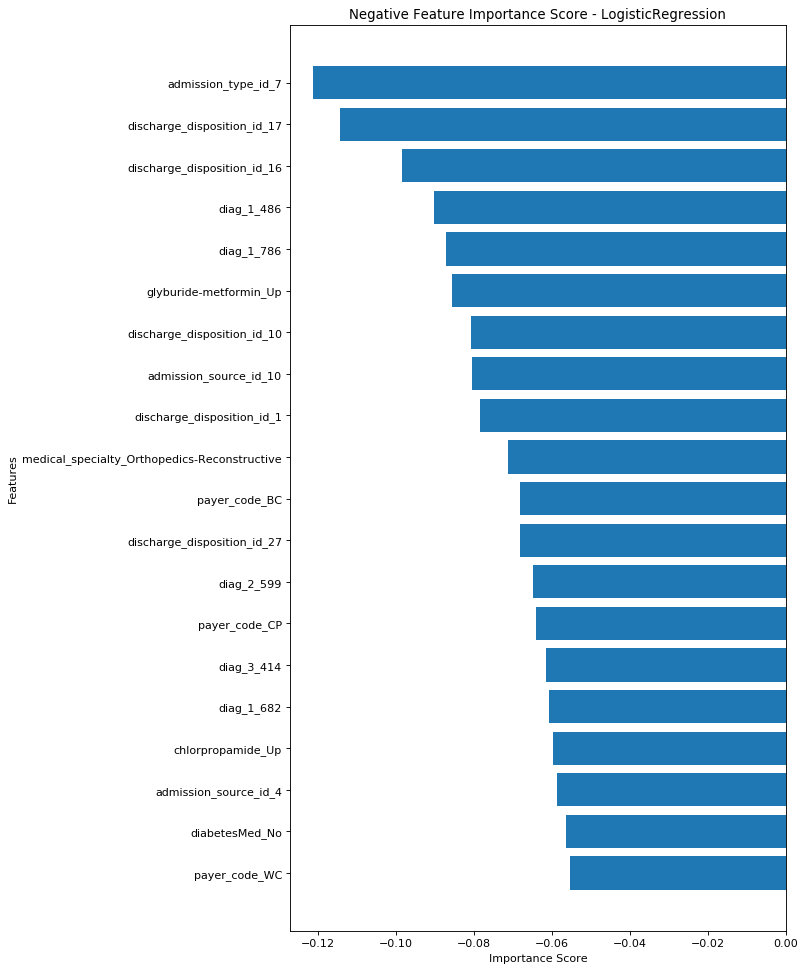

In [64]:
# selection_model = XGBClassifier(learning_rate=0.1, max_depth=2,n_estimators=400)
lr_model = models[1]
lr_model.fit(X_train_os, y_train_os)  

lr_y_pred = lr_model.predict(X_test_tf)
print_results(y_test, lr_y_pred)
plot_important_features(lr_model, list(all_X_train.columns), 20, 'Positive Feature Importance Score - LogisticRegression')
plot_important_features(lr_model, list(all_X_train.columns), 20, 'Negative Feature Importance Score - LogisticRegression','last')